[CNN, Convolutional Neural Network 요약](http://taewan.kim/post/cnn/#fn:3)

In [ ]:
from google.colab import drive
mp = '/gdrive'
drive.mount(mp, force_remount=True)

In [ ]:
from keras.datasets import  mnist
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

np.random.seed(121)
tf.random.set_seed(121)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,) [7 2]


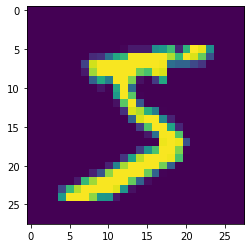

5


In [ ]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape) #(60000, 28, 28) --> 6만장의 28X28
print(X_test.shape, y_test.shape, y_test[:2])

plt.imshow(X_train[0]) #문제
plt.show()

print(y_train[0]) #답안

In [ ]:
from keras.models import Sequential

#----------------------FC->CNN : Conv2D, MaxPool2D, Flatten 추가됨
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
def CHART_PLOT_HISTORY(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['mse'],    label='mse')
    plt.plot(hist['epoch'], hist['val_mse'],label = 'val_mse')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'val_loss')
    plt.legend()
    plt.show()

In [ ]:
# X_train (60000, 28(W), 28(H), 1(Channel)) #컬러 = 채널 
# print(X_train[0]) 0 ~255 픽셀컬러 --> 스케일링 / 255
X_train = X_train.reshape(X_train.shape[0], 28,28,1) / 255
# X_test (10000, 28, 28)  --> 10000 * 784
X_test = X_test.reshape(X_test.shape[0], 28,28,1) / 255

In [ ]:
model = Sequential() 
#Conv2D와 Pool은 맘대로 쌓으면 된다.
model.add(Conv2D(filters=20, kernel_size=(4,4), input_shape=(28,28,1), activation='relu')) #커널 = 필터
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=40, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # Active map : 대략 6*6*40(필터는 maxpool해도 줄지 않아서 40이다.)

model.add(Flatten()) #6*6*40개를 한 줄로 펴서 넘겨줘

model.add(Dense(64, activation='relu')) #이미 특징만 잡았기 때문에 dense가 깊어질 필요가 없음.
model.add(Dense(10, activation='softmax')) #0~9까지 출력해달라
print(model.summary()) #total params : 53,018

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
None


In [1]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer="adam",   #GD(경사하강) SGD momentum ada.. adam
              loss='sparse_categorical_crossentropy', #손실함수 cost loss
              metrics=["accuracy"])

NameError: ignored

In [ ]:
history = model.fit(X_train,y_train,
          epochs = 100,
          batch_size=300,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

print('acc: {:.4f}, loss: {:.4f}'.format(model.evaluate(X_test, y_test)[1], model.evaluate(X_test, y_test)[0]))